#### Bike Sharing Linear Regression
#### Problem Statement:

BoomBikes, a US-based bike-sharing provider, has experienced a significant decline in revenue due to the COVID-19 pandemic. As the economy begins to recover, the company aims to develop a data-driven strategy to boost revenue by understanding the key factors influencing bike demand.

#### Business Goal:
 Develop a predictive model that will help management understand demand variations based on different factors. This model will enable them to optimize their business strategy, meet customer expectations, and expand into new markets effectively.

#### Objectives:




*   Identify key variables that significantly impact bike demand.
*   Analyze how well these variables explain fluctuations in demand.
*   Provide insights to help BoomBikes refine its business strategy.


### Step 1: Loading Bike Sharing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression

# import warnings module
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/course4-module1/Linear Regression Assignment/day.csv')
bike_sharing = df
bike_sharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Step 2: Data Quality Checks

In [ ]:
# Check  for null value
bike_sharing.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


### Step 4:Data Preparation

In [ ]:
# Dropping duplicates
bike_sharing.drop_duplicates(inplace = True)
bike_sharing.shape

(730, 16)

In [ ]:
#drop irrelevant data

Drop columns :

1. drop casual and registered as our focus is only total bike count.

2. Dropped instant due to redundancy as it contains indexing numbers.

3. Excluded dteday since mnth and yr columns provide sufficient date information.

In [ ]:
bike_sharing.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Converting season into a categorical variable

In [ ]:
bike_sharing['season'].value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [ ]:
#replacing the inumeric season value to it its orignal meaning ful categorical value
season_map = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
bike_sharing[['season']] = bike_sharing[['season']].replace(season_map)
bike_sharing[['season']].value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [ ]:
bike_sharing[['weathersit']].value_counts()

,count
weathersit,
1,463
2,246
3,21


In [ ]:
weather_map = {1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'}
bike_sharing[['weathersit']] = bike_sharing[['weathersit']].replace(weather_map)
bike_sharing[['weathersit']].value_counts()

,count
weathersit,
Clear,463
Mist & Cloudy,246
Light Snow & Rain,21


In [ ]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bike_sharing['mnth'].value_counts()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [ ]:
import calendar
bike_sharing['mnth'] = bike_sharing['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_sharing['mnth'].value_counts()

,count
mnth,
Jan,62
Mar,62
May,62
Jul,62
Aug,62
Oct,62
Dec,62
Apr,60
Jun,60


In [ ]:
#Mapping Weekday
day_map = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}
bike_sharing['weekday'] = bike_sharing['weekday'].replace(day_map)


### Step 5: Visualising the Data

#### Exploratory Data Analysis (EDA)

Univariate Analysis

In [ ]:
## Graph continuous (numerical) variables

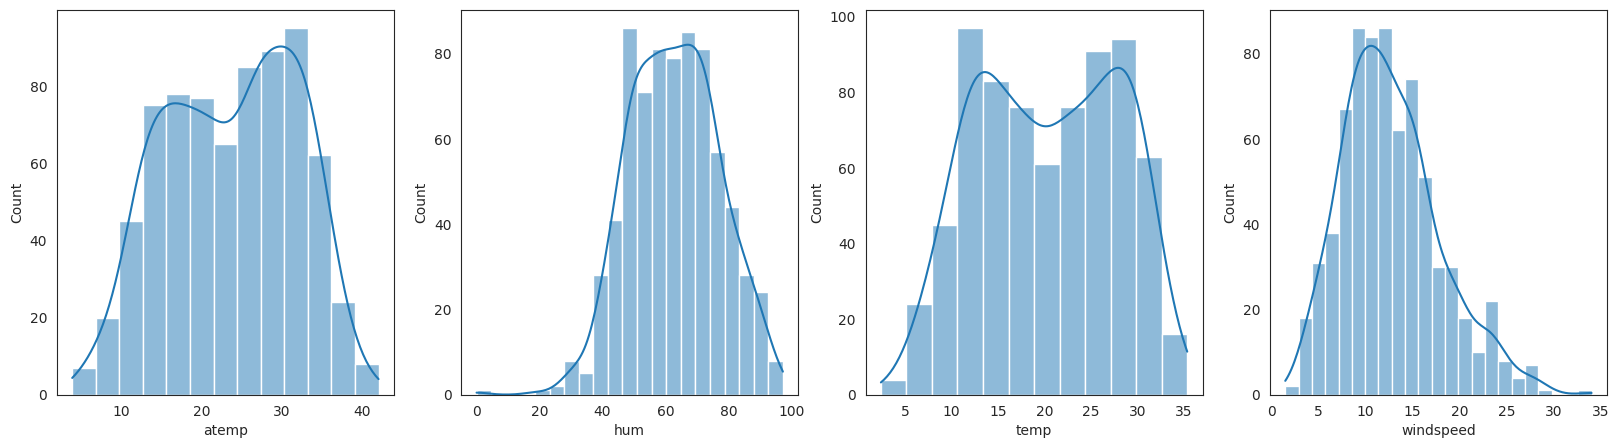

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

for i, (cont) in enumerate(['atemp', 'hum', 'temp', 'windspeed']):
    sns.histplot(data = bike_sharing, x = cont, ax = ax[i], kde = True)

plt.show()

- **Bikes were rented** at an average temperature (**temp**) of **20°C**.  
- The **average perceived temperature** (**atemp**) during bike rentals was **approximately 24°C**.  
- **Humidity** (**hum**) averaged around **62** during bike rentals.  
- The **average wind speed** (**windspeed**) during bike rentals was **approximately 12**.


In [ ]:
numeric_variable = ['cnt','temp', 'atemp','hum','windspeed']

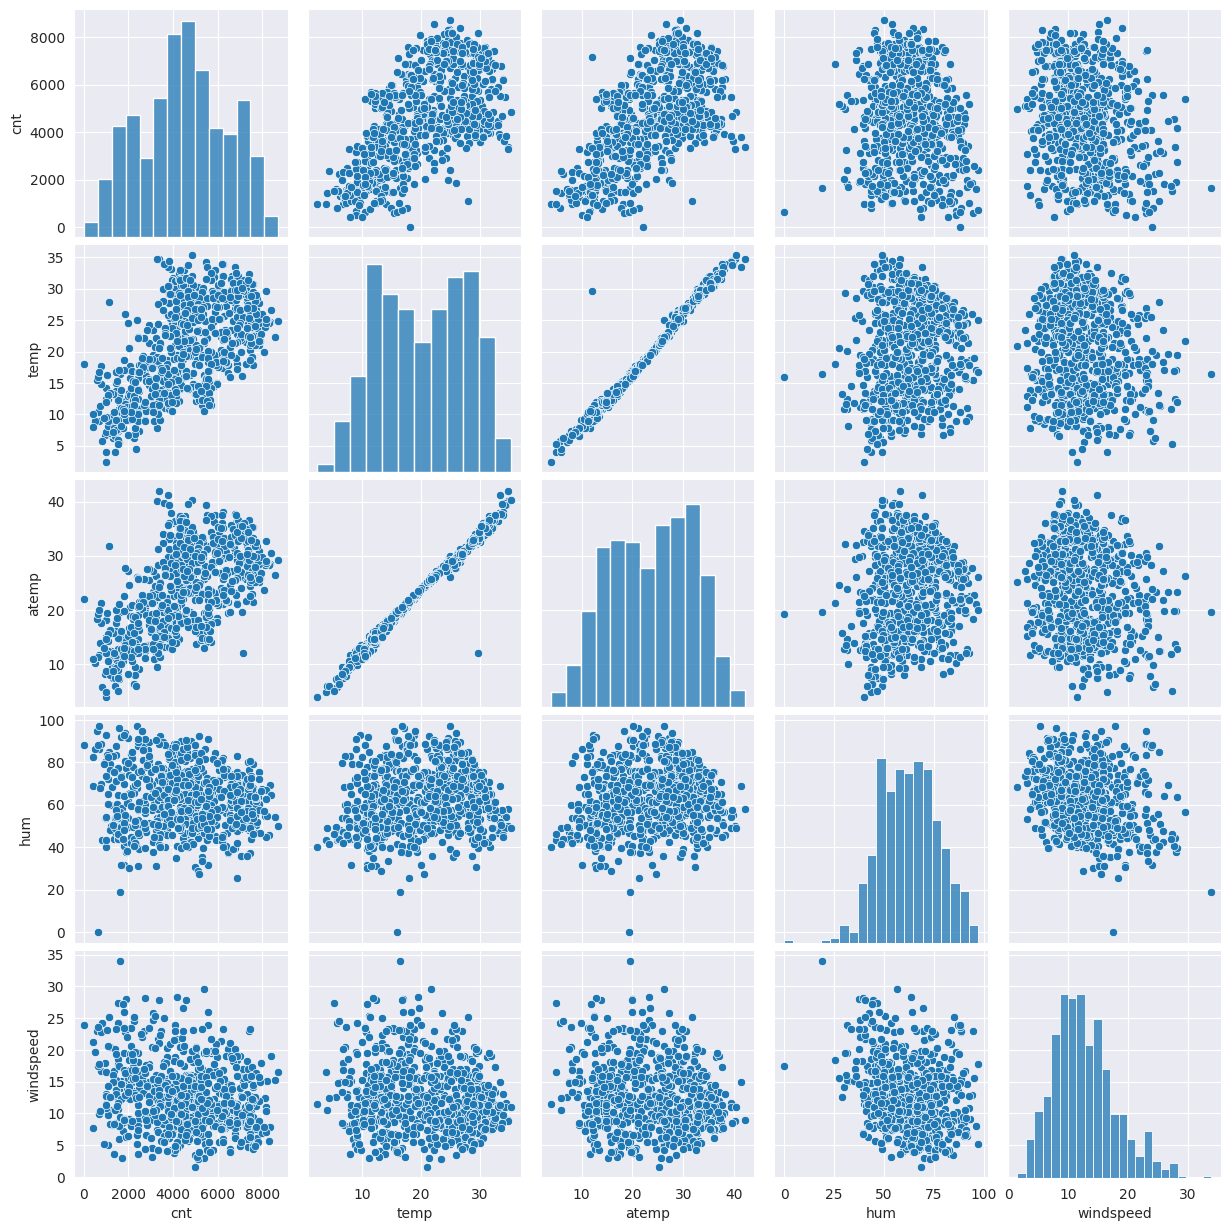

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(bike_sharing[numeric_variable])
plt.show()

##### Observation from Pair plot of numerical variable

By analyzing the numerical variables, we can infer that a **linear model** may be appropriate for this case, as some independent variables, such as **atemp** and **temp**, show a **positive correlation** with the target variable **cnt**.  


#### Visualising Categorical Variables : Using a Box Plot


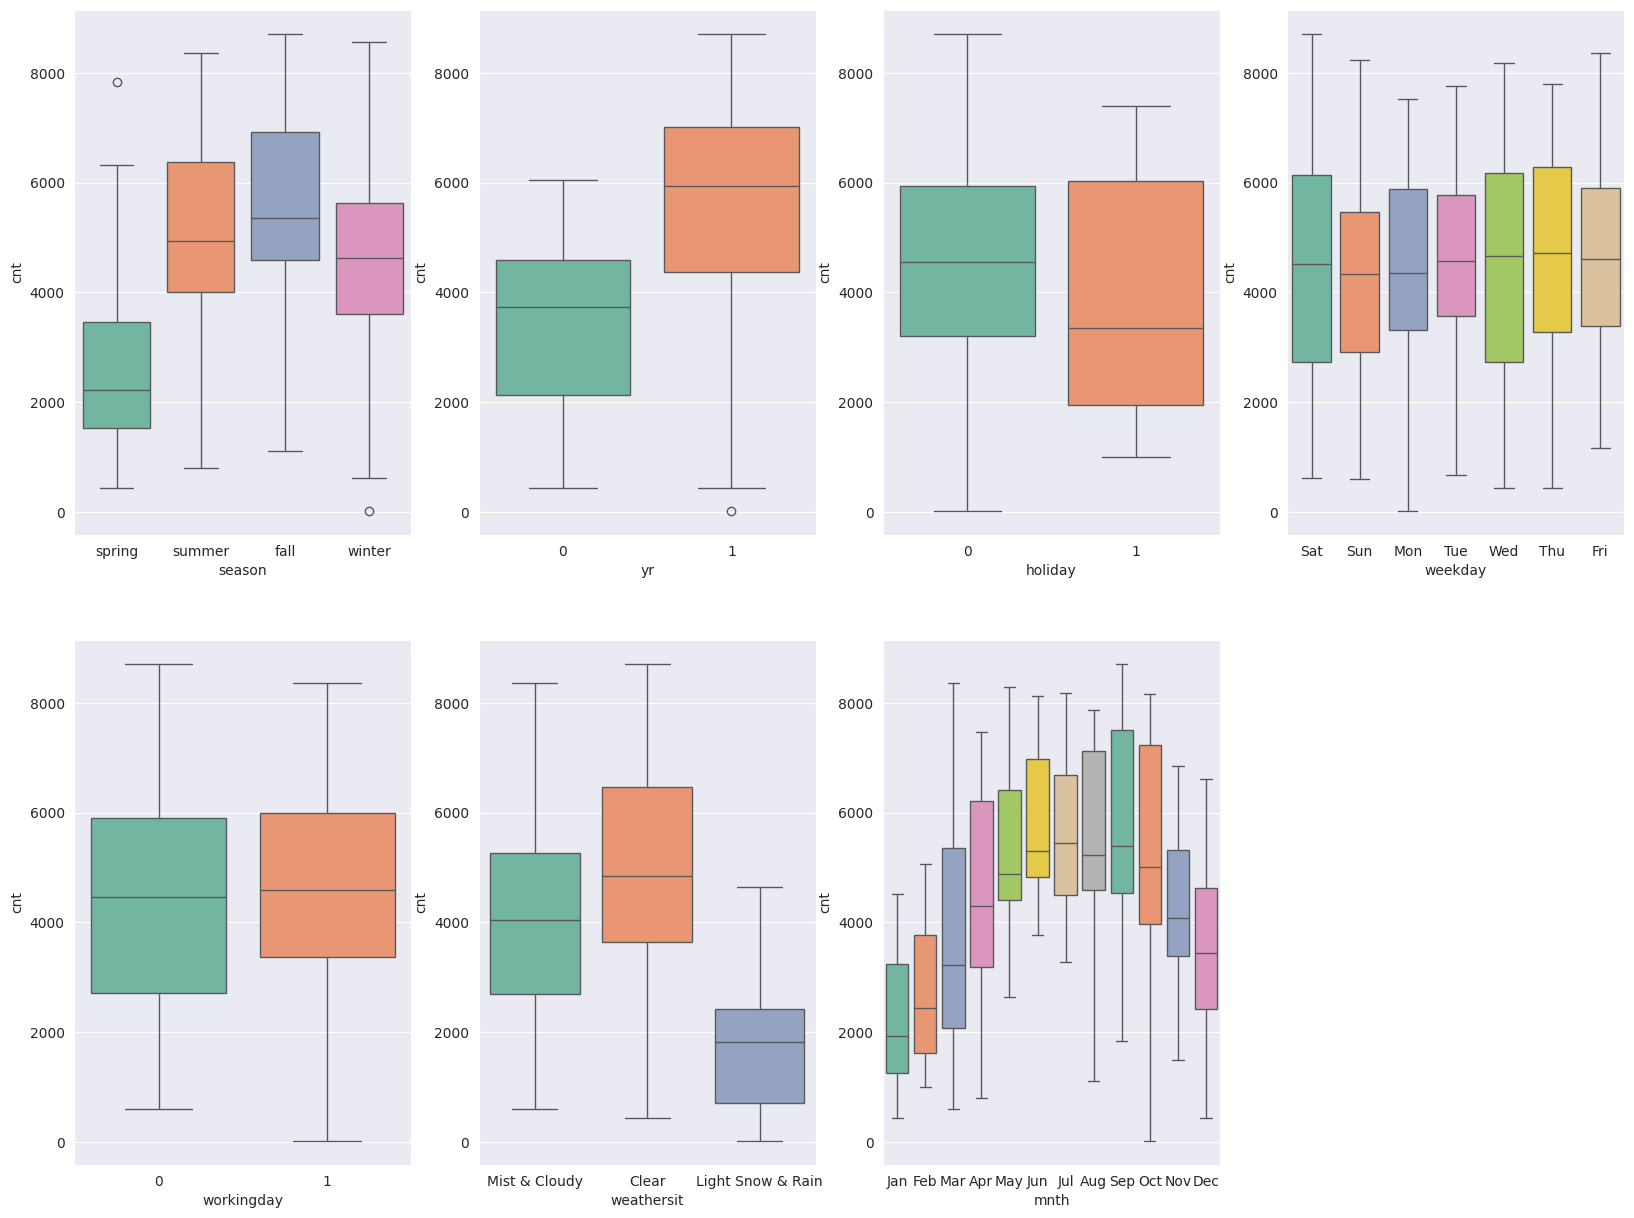

In [ ]:
plt.figure(figsize=(20, 15))


plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing, palette='Set2')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing, palette='Set2')
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing, palette='Set2')
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing, palette='Set2')
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing, palette='Set2')
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing, palette='Set2')
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing, palette='Set2')
plt.show()

#####  Observation from Pairplot

The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.


- **Seasonal analysis** reveals that **Fall (category 3)** has the highest median demand, indicating peak rentals during this season, while **Spring (category 1)** has the lowest.  
- The **year 2019** had a **higher user count** compared to 2018.  

- **Rental distribution** remains **consistent throughout the weekday**.  

- **No users count** were recorded during **heavy rain or snow**, suggesting these weather conditions are highly unfavorable. The **highest rental count** occurred when the weather was **clear or partly cloudy**.
  
- The **number of rentals peaked in September** but declined in **December**, likely due to **heavy snowfall**, which affected demand.  

- **Holidays** saw a **lower user count** compared to regular days.  
- The **"Workingday" boxplot** shows that **maximum bookings range between 4000 and 6000**, with the **median count remaining stable throughout the week**, indicating **little difference in bookings between working and non-working days**.  


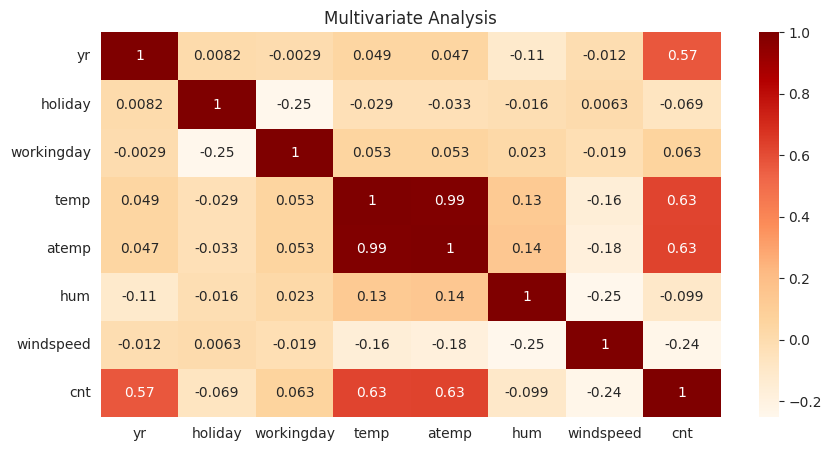

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(bike_sharing.corr(numeric_only = True), annot = True, cmap = 'OrRd')

plt.title("Multivariate Analysis")
plt.show()

- **Negative correlation:** The variable **cnt** shows a negative correlation with **holiday, humidity (hum), and windspeed**.  
- **Positive correlation:** Conversely, **cnt** exhibits a positive correlation with **year (yr), working day, temperature (temp), and perceived temperature (atemp)**.  
- **High correlation:** The strong correlation between **temp** and **atemp** reinforces our initial observation that these two variables are nearly identical.  


###  Step-6: Creating Dummy Variables

In [ ]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#create dummies for bike_share1 categorical data
categorical_variable = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']

In [ ]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
bike_share_dummy = bike_sharing[['season','mnth','weekday','weathersit']]

bike_share_dummy = pd.get_dummies(bike_share_dummy,drop_first=True, dtype=int)
bike_share_dummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   season_spring                 730 non-null    int64
 1   season_summer                 730 non-null    int64
 2   season_winter                 730 non-null    int64
 3   mnth_Aug                      730 non-null    int64
 4   mnth_Dec                      730 non-null    int64
 5   mnth_Feb                      730 non-null    int64
 6   mnth_Jan                      730 non-null    int64
 7   mnth_Jul                      730 non-null    int64
 8   mnth_Jun                      730 non-null    int64
 9   mnth_Mar                      730 non-null    int64
 10  mnth_May                      730 non-null    int64
 11  mnth_Nov                      730 non-null    int64
 12  mnth_Oct                      730 non-null    int64
 13  mnth_Sep                      730 n

In [ ]:

bike_share_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bike_sharing = pd.concat([bike_sharing, bike_share_dummy],axis = 1)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        730 non-null    object 
 1   yr                            730 non-null    int64  
 2   mnth                          730 non-null    object 
 3   holiday                       730 non-null    int64  
 4   weekday                       730 non-null    object 
 5   workingday                    730 non-null    int64  
 6   weathersit                    730 non-null    object 
 7   temp                          730 non-null    float64
 8   atemp                         730 non-null    float64
 9   hum                           730 non-null    float64
 10  windspeed                     730 non-null    float64
 11  cnt                           730 non-null    int64  
 12  season_spring                 730 non-null    int64  
 13  seaso

In [ ]:
#Deleting the orginal columns season.weathersit,weekday,mnth

bike_sharing.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

In [ ]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   cnt                           730 non-null    int64  
 8   season_spring                 730 non-null    int64  
 9   season_summer                 730 non-null    int64  
 10  season_winter                 730 non-null    int64  
 11  mnth_Aug                      730 non-null    int64  
 12  mnth_Dec                      730 non-null    int64  
 13  mnth_

In [ ]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Bringing the cnt column to first position in dataframe
bike_sharing = bike_sharing.loc[:, ['cnt'] + [col for col in bike_sharing.columns if col != 'cnt']]

In [ ]:
bike_sharing.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,985,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,...,0,0,0,1,0,0,0,0,0,1
1,801,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,...,0,0,0,0,0,0,0,1,0,0


##Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

In [ ]:
df_train.shape

(510, 30)

In [ ]:
df_test.shape

(220, 30)

#### Rescaling the Features

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to numeric column except dummy  variables column
num_vars = ['hum','windspeed','temp','atemp', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
576,0.827658,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0.465255,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0.204096,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0.482973,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0.191095,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train.describe()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.224421,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.corr().round(2)

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
cnt,1.00,0.59,-0.10,0.09,0.65,0.65,-0.06,-0.25,-0.55,0.14,...,0.06,0.20,-0.01,-0.02,-0.06,0.01,0.03,0.03,-0.23,-0.17
yr,0.59,1.00,-0.01,0.03,0.11,0.10,-0.08,-0.00,-0.04,0.02,...,-0.03,0.00,0.05,-0.03,-0.00,-0.01,-0.00,-0.00,-0.06,-0.01
holiday,-0.10,-0.01,1.00,-0.23,-0.07,-0.07,-0.03,0.02,0.05,-0.06,...,-0.00,0.04,0.28,-0.07,-0.07,0.01,-0.06,-0.07,-0.03,-0.04
workingday,0.09,0.03,-0.23,1.00,0.07,0.07,0.03,-0.04,-0.04,0.05,...,-0.05,0.02,0.17,-0.62,-0.59,0.25,0.27,0.30,0.02,0.04
temp,0.65,0.11,-0.07,0.07,1.00,0.99,0.16,-0.19,-0.61,0.13,...,-0.02,0.21,-0.03,-0.04,-0.02,0.00,0.05,0.03,-0.04,-0.09
atemp,0.65,0.10,-0.07,0.07,0.99,1.00,0.17,-0.22,-0.61,0.14,...,-0.01,0.21,-0.03,-0.04,-0.01,0.01,0.05,0.03,-0.04,-0.09
hum,-0.06,-0.08,-0.03,0.03,0.16,0.17,1.00,-0.27,-0.20,-0.01,...,0.17,0.15,0.02,-0.04,0.01,-0.04,0.01,0.05,0.24,0.48
windspeed,-0.25,-0.00,0.02,-0.04,-0.19,-0.22,-0.27,1.00,0.18,0.11,...,-0.02,-0.12,-0.00,0.05,-0.00,-0.00,-0.00,-0.02,0.09,-0.03
season_spring,-0.55,-0.04,0.05,-0.04,-0.61,-0.61,-0.20,0.18,1.00,-0.32,...,-0.17,-0.17,-0.01,0.02,0.00,0.01,-0.03,-0.01,-0.04,0.01
season_summer,0.14,0.02,-0.06,0.05,0.13,0.14,-0.01,0.11,-0.32,1.00,...,-0.17,-0.17,-0.00,-0.02,-0.01,-0.02,0.03,0.04,-0.05,0.04


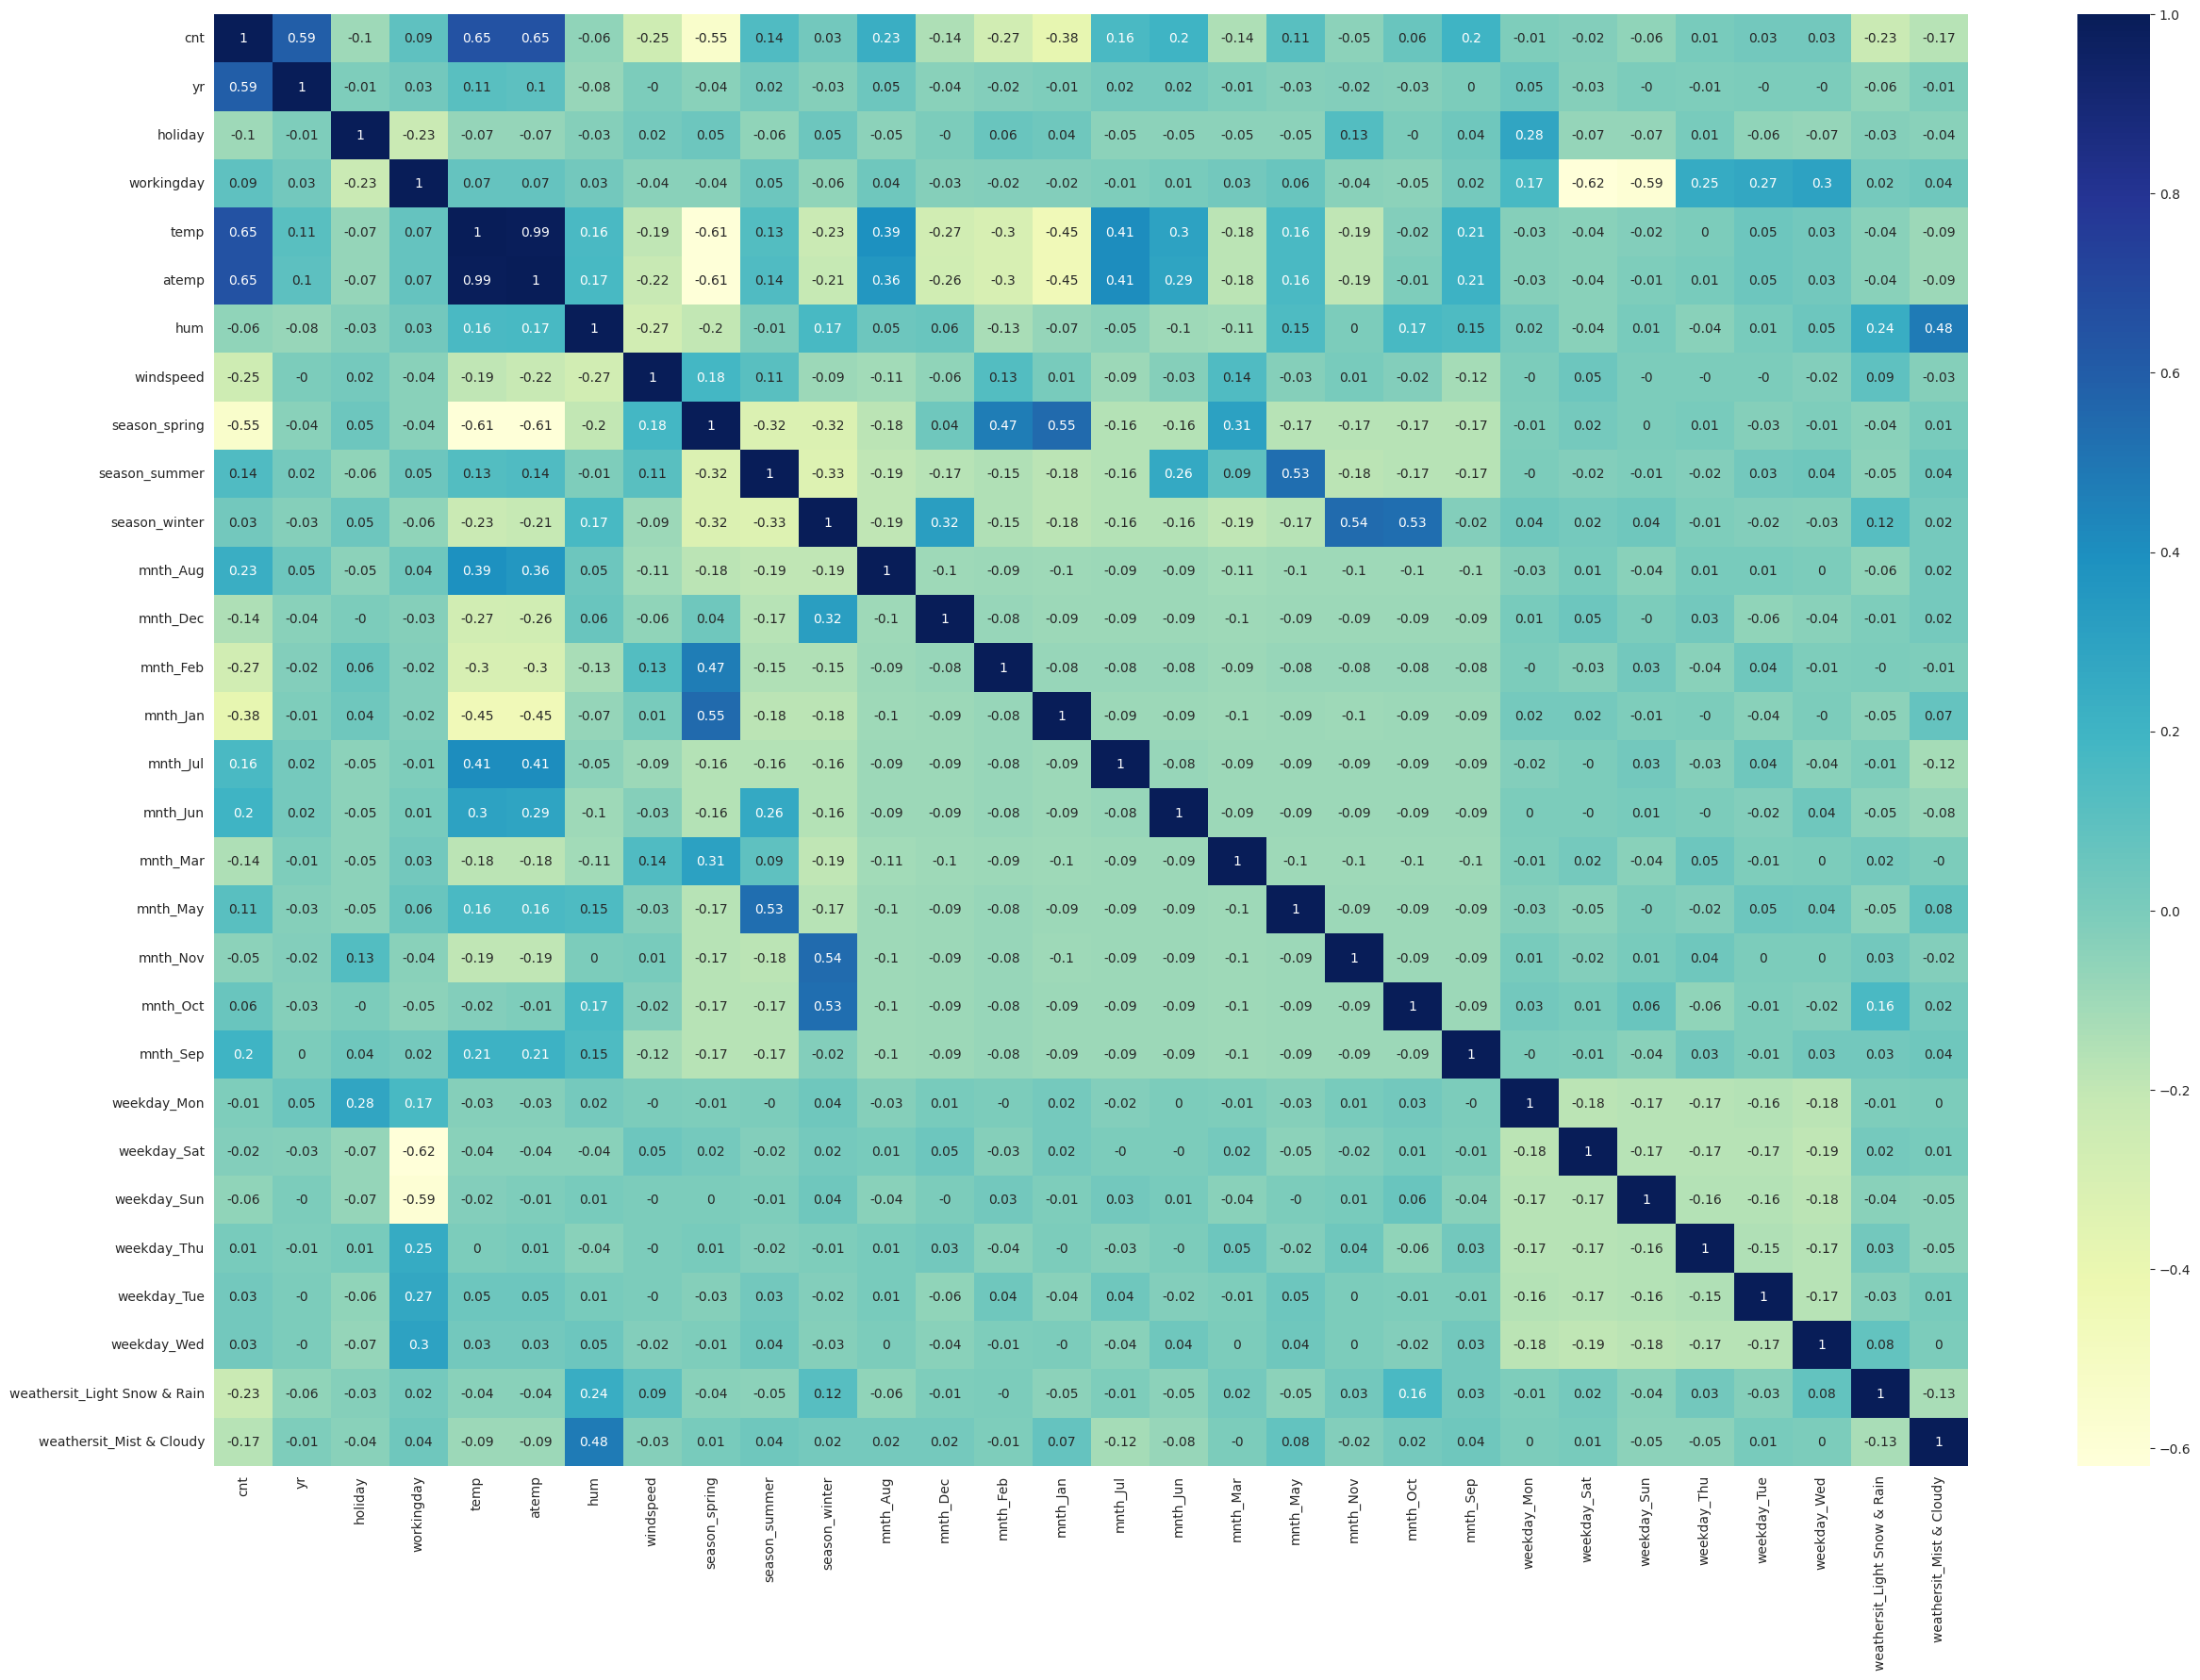

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr().round(2), annot = True, cmap="YlGnBu")
plt.show()

### Observation
As observed from the heatmap, **atemp** and **temp** appear to be correlated with the target variable **cnt**.

Heatmap also suggest that high  multicollinearity between **atemp** and **temp**




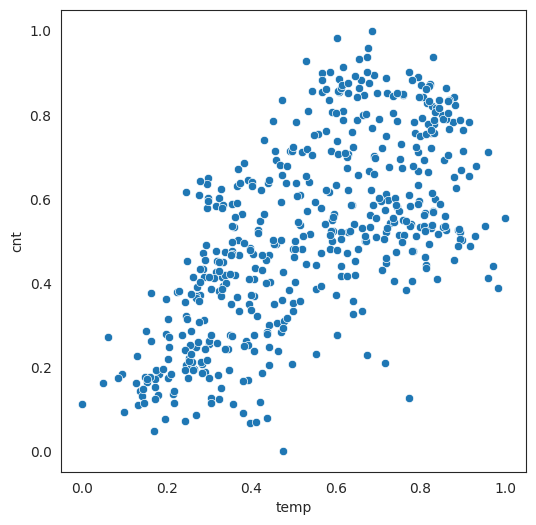

In [ ]:
#draw pair plot with
plt.figure(figsize=[6,6])
sns.set_style('white')
sns.scatterplot(x='temp', y='cnt',data=df_train,  )
plt.show()

In [ ]:
### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
y_train.shape

(510,)

In [ ]:
X_train.shape

(510, 29)

## Step 5 : Building our model

---



In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [ ]:
#Select the rfe column for statsmodel anaysis

X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

#### creating Model 1 - with RFE selected variable


In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_sm_1 = sm.add_constant(X_train_rfe)

In [ ]:
lm_1 = sm.OLS(y_train,X_train_sm_1).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.22e-191
Time:                        23:54:43   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Mist & Cloudy,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [ ]:
# From above  hum have high VIF(29.37) suggestion strong multicollinearity.  let remove this variable

#### creating Model 2 : without **hum** variable

In [ ]:
X_train_rfe_2 = X_train_rfe.drop(['hum'], axis = 1)

In [ ]:
X_train_sm_2 = sm.add_constant(X_train_rfe_2)

In [ ]:
lm_2 = sm.OLS(y_train,X_train_sm_2).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.60e-188
Time:                        23:54:43   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,yr,2.08
7,season_winter,1.98
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


In [ ]:
# From above  temp have high vif value(7.07) , lets remove and see the effect

#### creating Model 3 : without temp



In [ ]:
X_train_rfe_3 = X_train_rfe_2.drop(['temp'], axis = 1)

In [ ]:
X_train_sm_3 = sm.add_constant(X_train_rfe_3)

In [ ]:
lm_3 = sm.OLS(y_train,X_train_sm_3).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          6.44e-154
Time:                        23:54:43   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_spring,2.97
5,season_summer,2.29
6,season_winter,1.98
0,yr,1.91
10,weekday_Sat,1.69
7,mnth_Jan,1.60
12,weathersit_Mist & Cloudy,1.57
8,mnth_Jul,1.30


In [ ]:
#from above we see that mnth_Jul have high p value of 0.656.  which is greayer that 0.05 hence remove it

#### creating Model 4 : without temp variable

In [ ]:
X_train_rfe_4 = X_train_rfe_3.drop(['mnth_Jul'], axis = 1)

In [ ]:
X_train_sm_4 = sm.add_constant(X_train_rfe_4)

In [ ]:
lm_4 = sm.OLS(y_train,X_train_sm_4).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.73e-155
Time:                        23:54:43   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,season_spring,2.68
5,season_summer,2.01
0,yr,1.89
6,season_winter,1.78
9,weekday_Sat,1.62
7,mnth_Jan,1.60
11,weathersit_Mist & Cloudy,1.57
8,mnth_Sep,1.20


In [ ]:
#from above we see that holiday have high p(0.081) palue greater than .05 . lets remove it

#### creating Model 5 : without holiday variable


In [ ]:
X_train_rfe_5 = X_train_rfe_4.drop(['holiday'], axis = 1)

In [ ]:
X_train_sm_5 = sm.add_constant(X_train_rfe_5)

In [ ]:
lm_5 = sm.OLS(y_train,X_train_sm_5).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.01e-155
Time:                        23:54:44   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_spring,2.65
4,season_summer,2.00
0,yr,1.88
5,season_winter,1.73
6,mnth_Jan,1.60
10,weathersit_Mist & Cloudy,1.57
8,weekday_Sat,1.56
7,mnth_Sep,1.18


## Step 6 : Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [ ]:
y_train_pred = lm_5.predict(X_train_sm_5)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

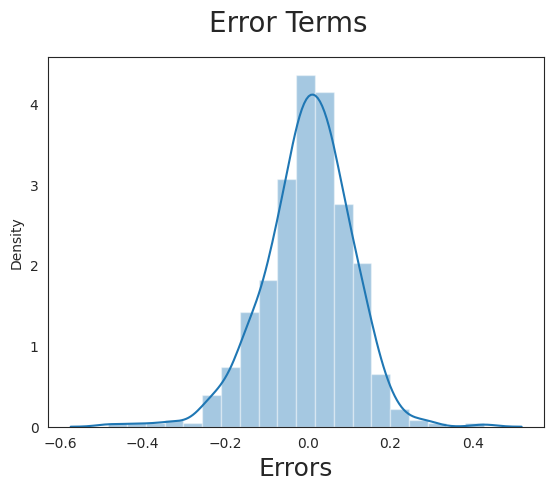

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label


*   The error terms follow the principle of a normal distribution curve.




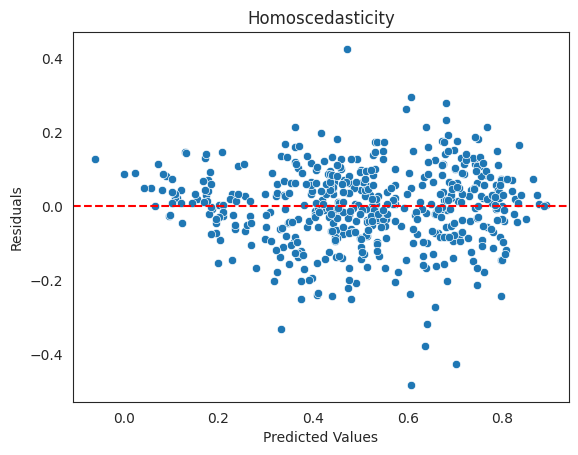

In [ ]:
#  Homoscedasticity
residuals = (y_train - y_train_pred)
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

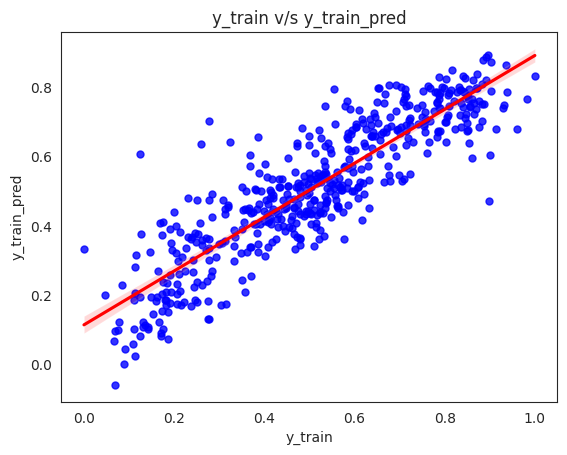

In [ ]:
# trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

## Step-7 : Making Predictions

#### Applying the scaling on the test sets

In [ ]:
df_test.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,6043,0,1,0,29.793347,33.27085,63.7917,5.459106,0,0,...,0,0,1,0,0,0,0,0,0,1
535,6211,1,0,1,32.082500,36.04875,59.2083,7.625404,0,1,...,0,0,0,0,0,0,0,1,0,0
299,2659,0,0,1,19.270000,22.85230,81.2917,13.250121,0,0,...,1,0,0,0,0,1,0,0,0,1
221,4780,0,0,1,31.433347,34.24915,42.4167,13.417286,0,0,...,0,0,0,0,0,0,0,1,0,0
152,4968,0,0,1,29.315000,32.19710,30.5000,19.583229,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Only Transform Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])


#### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test_scaled = X_test[X_train_rfe_5.columns]
X_test_scaled.head()

,yr,workingday,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Sep,weekday_Sat,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,0,0.084219,0,0,0,0,0,0,0,1
535,1,1,0.153728,0,1,0,0,0,0,0,0
299,0,1,0.334206,0,0,1,0,0,0,0,1
221,0,1,0.339570,0,0,0,0,0,0,0,0
152,0,1,0.537414,0,1,0,0,0,0,0,0


In [ ]:
# Adding constant variable to test dataframe
X_test_sm1 = sm.add_constant(X_test_scaled)

In [ ]:
# Making predictions using the fifth model

y_test_pred = lm_5.predict(X_test_sm1)

Text(0, 0.5, 'y_pred')

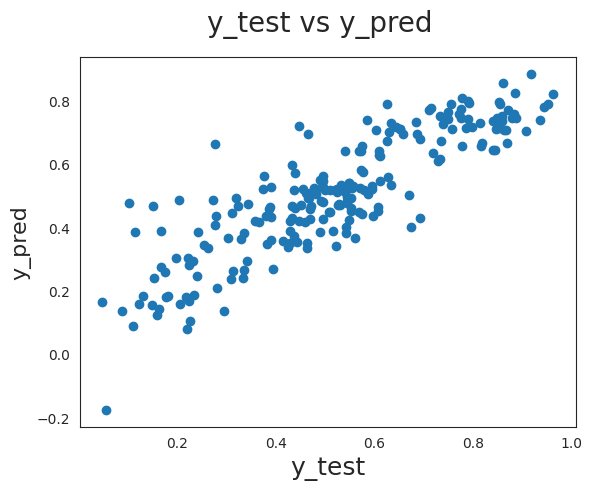

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [ ]:
# Coefficients of the final model
round(lm_5.params, 2)

,0
const,0.53
yr,0.25
workingday,0.06
windspeed,-0.19
season_spring,-0.26
season_summer,-0.04
season_winter,-0.07
mnth_Jan,-0.10
mnth_Sep,0.07
weekday_Sat,0.06


cnt = 0.53 + 0.25yr + 0.06*workingday - -0.19*windspeed - .26*season_spring - 0.04*season_summer - 0.07*season_winter -0.1*mnth_jan + 0.7*mnth_Sep + 0.06*weekday_Sat -0.30*weathersit_Light Snow & Rain -0.09*weathersit_Mist & Cloudy

In [ ]:
# Get R2 Score for Training set
r2_score_train = round(lm_5.rsquared, 2)
print(r2_score_train)
adj_r2_score_train = round(lm_5.rsquared_adj, 2)
print(adj_r2_score_train)


0.78
0.77


In [ ]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.74

- **Model Generalization:** The close alignment of **R²** and **Adjusted R²** values between the training and test sets (**R²: 0.78 vs. 0.77**, **Adjusted R²: 0.74) suggests effective generalization. This indicates that the model avoids overfitting and is likely to perform well on new data.  

- **Key Influencing Factors:** Bike demand is influenced by variables such as **yr, workingday, Light Snow & Rain, windspeed, Spring,**

- **Most Significant Features:** The variables ** yr, and Light Snow & Rain** have the highest coefficient values, highlighting their strong impact on bike demand.  